In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

# Read in the Data

declare columns names

In [11]:
column_names = ['age' , 'workclass' , 'fnlwgt' , 'education' , 'education-num' , 'marital-status' , 'occupation' , 'relationship' , 'race' , 'sex' , 'capital-gain' , 'capital-loss' , 'hours-per-week' , 'native-country', "target"]

In [3]:
adultDF = pd.read_csv('./data/adult.data', index_col=False, names=column_names)

## Clean the Data

In [4]:
adultDF = strip_spaces(adultDF)

stripped leading/trailing spaces from all cells of string type


In [5]:
columns_with_placeholders = ['workclass', 'occupation', 'native-country']
adultDF = replace_column_w_nan(adultDF,columns_with_placeholders, "?")

Replaced ? values from these columns:['workclass', 'occupation', 'native-country']


Because of the results of our EDA, we will be able to drop missing rows: 
- The workclass column is missing 5.6% of rows
- The occupation column is missing 5.7% of rows
- The native-country column is missing 1.8% of rows

In [12]:
adultDF = drop_na_rows(adultDF, columns_with_placeholders)

Removed NA rows from these columns:['workclass', 'occupation', 'native-country'].


In [13]:
adultDF = adultDF.drop_duplicates()
check_duplicates(adultDF)

You're all clear of duplicates


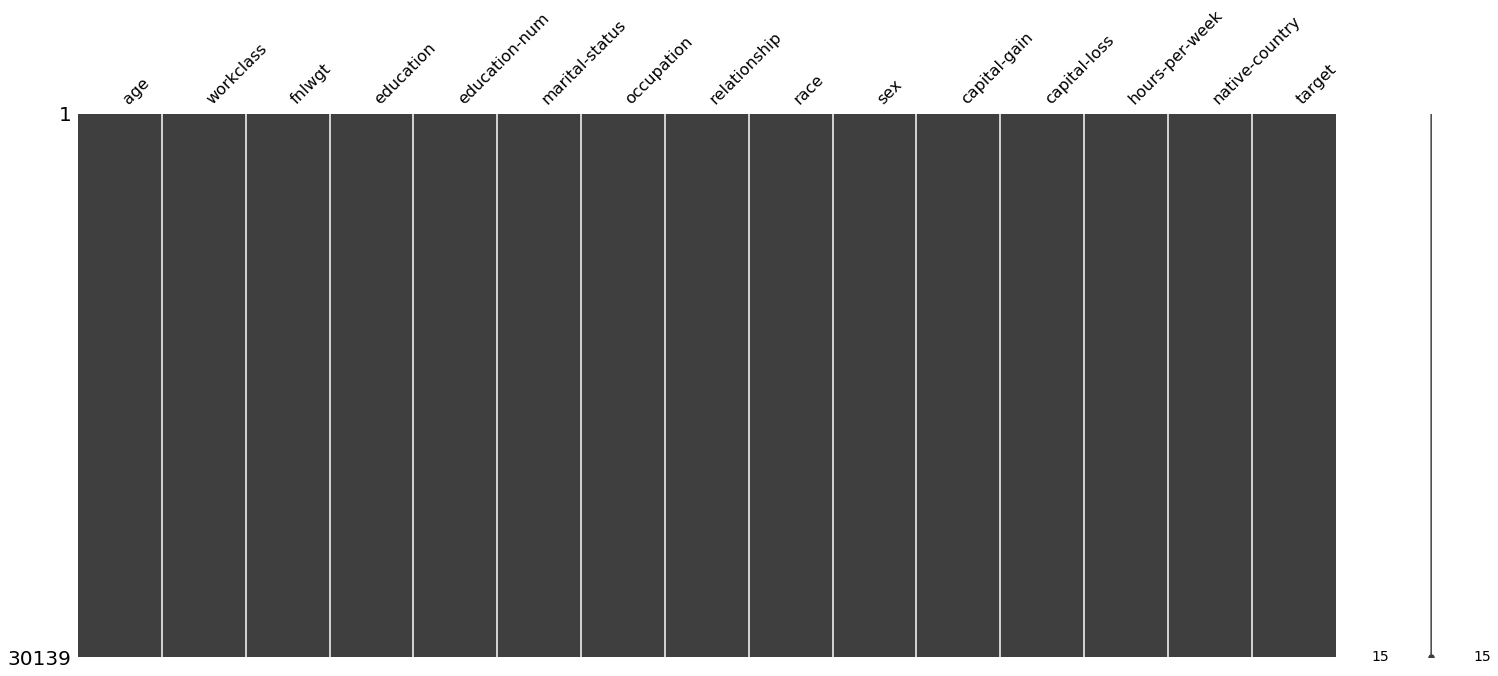

In [14]:
msno.matrix(adultDF)

At this point, we have stripped all white spaces, removed 24 duplicates, replaced '?' values with NaNs, and finally dropped rows with missing values.

We don't see a need to drop any columns for cleaned data - we'll leave that for the model notebook to determine which columns are relevant or not. 

We can however, explore the distribution of the data for outliers and such.

In [18]:
continuous_columns = list(adultDF.describe().columns)

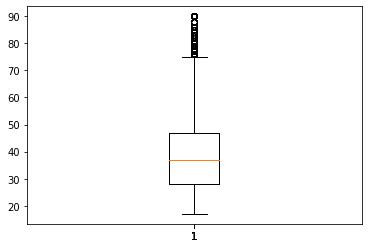

In [22]:
for column in continuous_columns:
    plt.boxplot(adultDF.age)